# Iteração de valor
#### Prof. Armando Alves Neto - Introdução ao Aprendizado por Reforço - PPGEE/UFMG

Também é possível calcular a política $\pi^*(s)$ diretamente da função valor $v(s)$. Chamamos isso de iteração de valor.

Importando bibliotecas.

In [1]:
import numpy as np
import class_gridworld_env as cge

Definindo parâmetros principais do algoritmo.

In [2]:
GAMMA = 0.9
THETA = 1.0e-3

Criando a classe principal.

Agora temos uma política $a = \pi(s)$, inicializada com valores aleatórios.

In [3]:
class ValueIteration:
    def __init__(self):

        # environment
        self.env = cge.Gridworld_Env()
        self.size = self.env.getSize()

        # fator de desconto
        self.gamma = GAMMA

        # inicia o mundo
        self.reset()

    ##########################################
    def reset(self):

        # reseta ambiente
        self.env.reset()

        # value function 
        self.value = np.zeros((self.size, self.size))

        # politica
        nactions = len(self.env.actions)
        self.pi = np.random.choice(nactions, (self.size, self.size))

        # quantos passos
        self.steps = 0

Equação de Bellman dado um estado $s$:

$$
\begin{equation}
    v_\pi(s) = \max_a \sum_{s' \in \mathcal{S}, ~r} p(s', r | s, a) \big[ r + \gamma v_\pi(s') \big]
    \end{equation}
$$

In [4]:
class ValueIteration(ValueIteration):
    ##########################################
    # Bellman equation
    def bellmanEquation(self, s):
        vs = []
        
        # para todas as ações
        for a, action in enumerate(self.env.actions):    
            # interage com o ambiente
            sl, r, _, _ = self.env.step(s, action)
            
            # armazena valor obtido
            vs.append(r + self.gamma*self.value[sl])
            
        # retorna o valor maximo
        return np.max(vs)

Etapa de iteração do valor e cálculo da política determinística $\pi \approx \pi_*$.

In [5]:
class ValueIteration(ValueIteration):
    ##########################################
    # Value iteration
    def runEpsisode(self, in_place=False):

        ######################################
        # Iteracao de valor
        while True:
            Delta = 0.0

            # synchronous oy asynchronous mode?
            Vs  = self.value if in_place else np.empty_like(self.value)

            # para todos os estados
            for i in range(len(self.value)):
                for j in range(len(self.value[i])):

                    # estado
                    s = (i,j)

                    # apply bellman expectation equation to each state
                    v = Vs[s]
                    Vs[s] = self.bellmanEquation(s)

                    Delta = np.max([Delta, np.abs(v - Vs[s])])

            # atualiza valores
            self.value = Vs

            self.steps += 1

            # convergiu?
            if Delta < THETA: break


        ######################################
        # retorna politica deterministica
        for i in range(len(self.value)):
            for j in range(len(self.value[i])):
                # estado
                s = (i,j)

                vs = []
                # verifica qual ação tem valor máximo
                for a, action in enumerate(self.env.actions):
                    sl, r, _, _ = self.env.step(s, action)
                    vs.append(r + self.gamma*self.value[sl])
                
                # melhor ação
                self.pi[s] = np.argmax(vs)

        return self.value, self.pi

Programa principal.

Convergiu em 9 passos!


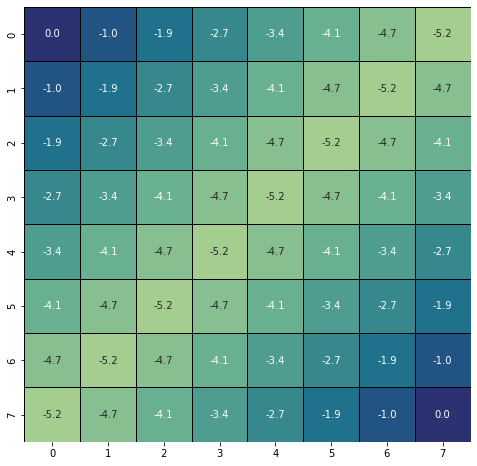

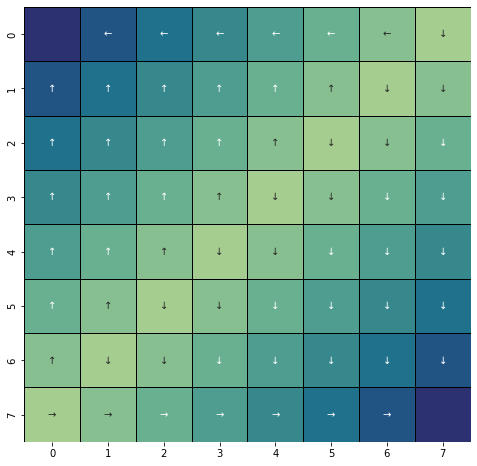

In [6]:
if __name__ == "__main__":

    val_ite = ValueIteration()

    value_table, pi_best = val_ite.runEpsisode()
    print('Convergiu em %d passos!' % val_ite.steps)
    
    '''# salva a melhor politica
    policy = [p for p in pi_best]
    np.savez('policy.npz', policy=policy)'''

    # renderiza Figure 4.1 (Sutton and Barto)
    val_ite.env.render(value=value_table, pi=pi_best)